## L-fold Cross	Validation

In [1]:
#Python version
!python --version #This assignment use the version of 3.6.0

Python 3.6.4 :: Anaconda, Inc.


In [2]:
#import library
from csv import reader #read csv file
import random #resampling training set
from random import seed #gives it its first "previous" value
import operator #sort
import pandas as pd #build dataframe
import numpy as np #calculation
import matplotlib #plotting
import matplotlib.pyplot as plt #plotting
matplotlib.style.use('ggplot') #change plotting style

In [3]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        #read file
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            #add each row in list
            dataset.append(row)
    #remove the header
    dataset.pop(0)
    return dataset

In [4]:
#load training set and remove header
trainset=[[float(i) for i in a] for a in load_csv("Task1A_train.csv")]
trainset

[[1960.0, 0.71],
 [1960.5, 0.85],
 [1961.0, 0.61],
 [1961.5, 0.92],
 [1962.0, 0.72],
 [1962.5, 0.92],
 [1963.0, 0.83],
 [1963.5, 1.0],
 [1964.0, 0.92],
 [1964.5, 1.24],
 [1965.0, 1.16],
 [1965.5, 1.45],
 [1966.0, 1.26],
 [1966.5, 1.86],
 [1967.0, 1.53],
 [1967.5, 1.83],
 [1968.0, 1.53],
 [1968.5, 2.34],
 [1969.0, 2.16],
 [1969.5, 2.7],
 [1970.0, 2.79],
 [1970.5, 3.69],
 [1971.0, 3.6],
 [1971.5, 4.32],
 [1972.0, 4.86],
 [1972.5, 5.04],
 [1973.0, 5.58],
 [1973.5, 6.57],
 [1974.0, 6.03],
 [1974.5, 6.93],
 [1975.0, 6.93],
 [1975.5, 7.83],
 [1976.0, 7.74],
 [1976.5, 8.28],
 [1977.0, 9.54],
 [1977.5, 9.54],
 [1978.0, 11.88],
 [1978.5, 12.15],
 [1979.0, 14.04],
 [1979.5, 14.85],
 [1980.0, 16.2],
 [1980.5, 16.02]]

In [5]:
#loading test set and remove header
testset=[[float(i) for i in a] for a in load_csv("Task1A_test.csv")]
testset

[[1960.25, 0.63],
 [1960.75, 0.44],
 [1961.25, 0.69],
 [1961.75, 0.55],
 [1962.25, 0.77],
 [1962.75, 0.6],
 [1963.25, 0.8],
 [1963.75, 0.77],
 [1964.25, 1.0],
 [1964.75, 1.0],
 [1965.25, 1.3],
 [1965.75, 1.25],
 [1966.25, 1.38],
 [1966.75, 1.56],
 [1967.25, 1.59],
 [1967.75, 1.86],
 [1968.25, 2.07],
 [1968.75, 2.25],
 [1969.25, 2.43],
 [1969.75, 2.25],
 [1970.25, 3.42],
 [1970.75, 3.6],
 [1971.25, 4.32],
 [1971.75, 4.05],
 [1972.25, 5.04],
 [1972.75, 4.41],
 [1973.25, 5.85],
 [1973.75, 5.31],
 [1974.25, 6.39],
 [1974.75, 5.85],
 [1975.25, 7.74],
 [1975.75, 6.12],
 [1976.25, 8.91],
 [1976.75, 6.84],
 [1977.25, 10.26],
 [1977.75, 8.73],
 [1978.25, 12.06],
 [1978.75, 8.91],
 [1979.25, 12.96],
 [1979.75, 9.99],
 [1980.25, 14.67],
 [1980.75, 11.61]]

######  knn model 

In [6]:
#calculate euclidean distance
def euclideanDistance(x,y):
    x=np.array(x)
    y=np.array(y)
    dist = np.sqrt(np.sum((x-y)**2))
    return dist

In [7]:
#calculate average value
def average_value(value):
    length=len(value)
    average=sum(value)/length
    return average

In [8]:
#calculate errors using rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [9]:
#KNN model
def knn(train_data, train_label, test_data, k=3):
    distances = []
    test_label=[]
    neighbor_value=[]
    length = len(test_data)-1
    for each in range(len(test_data)):
        #calculate distance between test label x and each train point
        for x in range(len(train_data)):
            dist = euclideanDistance(test_data[each], train_data[x])
            #add all distance to list
            distances.append((train_data[x], dist))
        #sort all of distances in ascending order
        distances.sort(key=operator.itemgetter(1))
        #find first k values
        for num in distances[:k]:
            neighbor_value.append(num[0][1])
        #take average of values
        average_distance=average_value(neighbor_value)
        test_label.append(average_distance)
        neighbor_value=[]
        distances=[]
    return test_label

### STEP I: 	
Implement a L-Fold Cross Validation (CV) function for your KNNregressor:


In [16]:
# Split a dataset into k folds
def cross_validation_split(train_data, train_label, numfolds=10, k=4):
    dataset_split = list()
    dataset_copy = list(train_data)
    dataset_split = []
    #step1: shuffle the training data using round robin
    dataset_copy = random.sample(dataset_copy, len(dataset_copy))
    for i in range(numfolds):
        dataset_split.append([])
    for index, element in enumerate(dataset_copy):
        index_bin = (int)(index % numfolds)
        dataset_split[index_bin].append(element)                  
    
    #step 2: splitting training dataset into K subset
    training_set=[]
    test_set=[]
    fold_errors=[]
    #test set would be from first subset to last subset
    for i in range(numfolds):
        test_set+=dataset_split[i]
        #take ith training set as test set.
        for j in range(numfolds):
            #if i is not equal to j, then add j to training set, and make j as part of training set
            if j!=i:
                training_set+=dataset_split[j]

        #step3: training ith training dataset and get a KNN model. 
        knn_set=knn(training_set, train_label, test_set, k)
        #real label
        real_set=[x[1] for x in dataset_split[i]]
        #using rmse to calculate the errors
        errors=rmse(np.array(knn_set), np.array(real_set))
        fold_errors.append(errors)
        
        training_set=[]
        test_set=[]
    
    return fold_errors

### Step II: 
Plot the average error numbers versus 1/K for K=1,..,20 in your KNN regressor. And add two dashed lines around the average error indicating the average +/-standard deviation of errors. 

In [17]:
#extract train labels
train_label=[]
for each in trainset:
    train_label.append(each[1])

In [18]:
#testing model
seed(1)
errors_list=[]
average_set=[]
sd_positive_list=[]
sd_negative_list=[]
sd_list=[]
#change the value of k=1,...,20 in KNN regressor
for k in range(1,21):
    #l folder cross validation
    cv_errors=cross_validation_split(trainset, train_label, 10, k)
    errors_list.append(cv_errors)
    #average errors
    average_error=sum(cv_errors)/10
    average_set.append(average_error)
    #calculate standard deviation of errors
    sd=np.array(cv_errors).std()
    sd_list.append(sd)
    #get a list of values for average errors+sd
    positive_value=average_error+sd
    #get a list of values for average_error-sd
    negative_value=average_error-sd
    sd_positive_list.append(positive_value)
    sd_negative_list.append(negative_value)

In [19]:
#build a dataframe to plotting
df3 = pd.DataFrame({'k':[1/x for x in range(1,21)],
                   'average':average_set,
                   'standard_deviation_positive': sd_positive_list,
                   'standard_deviation_negative': sd_negative_list,
                    'standard_deviation': sd_list})
df3 = df3.set_index('k')
df3.head()

,average,standard_deviation,standard_deviation_negative,standard_deviation_positive
k,,,,
1.000000,0.301834,0.137791,0.164043,0.439625
0.500000,0.340856,0.097546,0.243310,0.438401
0.333333,0.453508,0.293675,0.159833,0.747183
0.250000,0.369164,0.302915,0.066249,0.672078
0.200000,0.494738,0.572695,-0.077957,1.067433


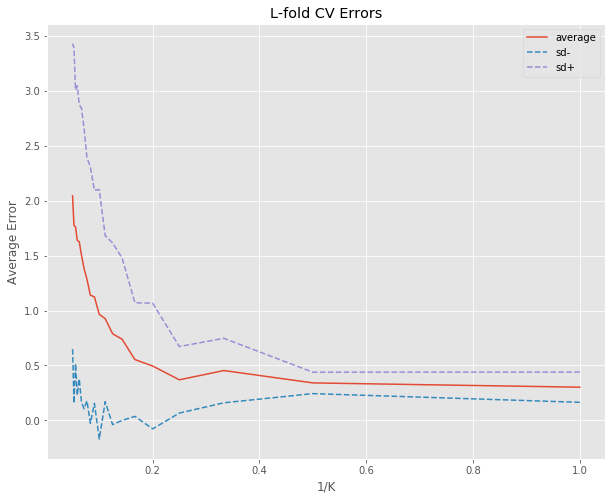

In [20]:
#plot a graph
plt.figure(figsize=(10,8))
plt.plot(df3['average'],linestyle='-')
plt.plot(df3['standard_deviation_negative'], linestyle='--')
plt.plot(df3['standard_deviation_positive'], linestyle='--')

#set x-axis  label
plt.xlabel("1/K")
#set y-axis label
plt.ylabel("Average Error")
#set title
plt.title('L-fold CV Errors')
plt.legend(labels=['average','sd-','sd+'])
plt.show()
#plt.savefig('myfig1.png', dpi=1000)

### Summary: 

K=2 is the best value for the model because it result to minimum average error and minimum standard deviation of errors based on cross validation plot. 

When K=1, The error and standard deviation are not too high, because it fits model only to the 1-nearest point. This means the model will be really close to training data. The variance is relatively higher, because optimizing on only 1-nearest point means that the probability of modelling with the noise is really high. 

After K=2, CV error and standard deviation beginning to goes up. This is because the larger the K, the more decision boundary smoother and the model is more simplier. And eventually will get a model that under-fits the data rather than over-fitting it.  